#                       Credit Card Fraud Detection Capstone Project

###### Name: Sagarika Shukla

## Introduction:

##### - The Credit Card Fraud Detection project focuses on enhancing financial security through advanced machine learning and data analysis techniques.

##### - Its primary goal is to develop a predictive model that can proactively distinguish between legitimate and fraudulent credit card transactions.

##### - Leveraging machine learning, specifically supervised learning and anomaly detection, this project addresses the dynamic nature of fraud patterns, surpassing the limitations of traditional rule-based systems.

##### - Key components involve data preprocessing, feature engineering, model selection, and evaluation metrics.

##### - The exploration of machine learning algorithms, including logistic regression, decision trees, random forests, and support vector machines, aims to identify the most effective approach for fraud detection.

##### - Ultimately, the project aims to provide a robust, efficient, and adaptive solution to safeguard financial transactions from the evolving landscape of fraudulent activities.

### Project Objectives

##### - In this project, the goal is to leverage machine learning models to predict fraudulent credit card transactions. The process typically involves preprocessing and exploring the dataset, which may include features such as transaction amount, location, time, and previous transaction history.

##### - After splitting the dataset into training and testing sets, various machine learning algorithms such as logistic regression, decision trees, random forests, or support vector machines can be employed to build predictive models.

##### - The models are trained on a labeled dataset where instances of fraudulent and non-fraudulent transactions are identified. Evaluation metrics like precision, recall, and the F1 score are commonly used to assess the model's performance. Continuous improvement may involve tuning hyperparameters, employing ensemble methods, or exploring more advanced techniques like anomaly detection.

##### - The final model aims to accurately identify and prevent fraudulent credit card transactions by learning patterns from historical data.

### Project Understanding

##### - Suppose you get a call from your bank, and the customer care executive informs you that your card is about to expire in a week. Immediately, you check your card details and realise that it will expire in the next eight days. Now, to renew your membership, the executive asks you to verify a few details such as your credit card number, the expiry date and the CVV number. Will you share these details with the executive?

##### - In such situations, you need to be careful because the details that you might share with them could grant them unhindered access to your credit card account.

##### - Although digital transactions in India registered a 51% growth in 2018–2019, their safety remains a concern. Fraudulent activities have increased severalfold, with approximately 52,304 cases of credit/debit card fraud reported in FY 2019 alone. Owing to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time to help consumers and banks that are losing their credit worth each day. Machine learning can play a vital role in detecting fraudulent transactions.

### Problem Statement

##### The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.



In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [112]:
df = pd.read_csv("creditcard.csv")

### Details of the Columns:


Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

V1-V28: Result of a PCA Dimensionality reduction to protect user identities and sensitive features

Amount: Transaction amount

Class: 1 for fraudulent transactions, 0 otherwise (dependent variable)

In [113]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [114]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Handling Missing Values

In [115]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Outliers treatment
##### As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

In [116]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

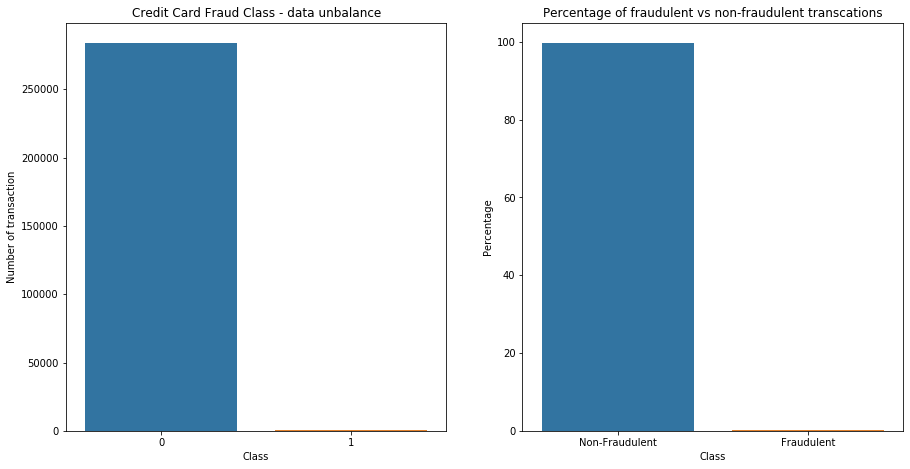

In [117]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

### Observation

#### The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

In [118]:
df['Amount'].describe() 

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Check if the data is balanced or imbalanced. the percentage of fraud.

As we can see the number of fraudalent transactions are way too less that genuiene transactions. so we can say that it is an imbalanced dataset.

Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

In [119]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [120]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [121]:
df.drop(['Amount','Time'], inplace =True, axis=1)

In [122]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [123]:
y = df.Class
x = df.drop(['Class'],axis=1)

Splitting the data into training and test set. 80% training. 20% test set

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
print("The shape of x_train: ", x_train.shape)
print("The shape of x_test: ",x_test.shape)

The shape of x_train:  (227845, 29)
The shape of x_test:  (56962, 29)


#### Checking the Skewness

In [126]:
# Listing the columns
cols = x_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Normalized_Amount'],
      dtype='object')

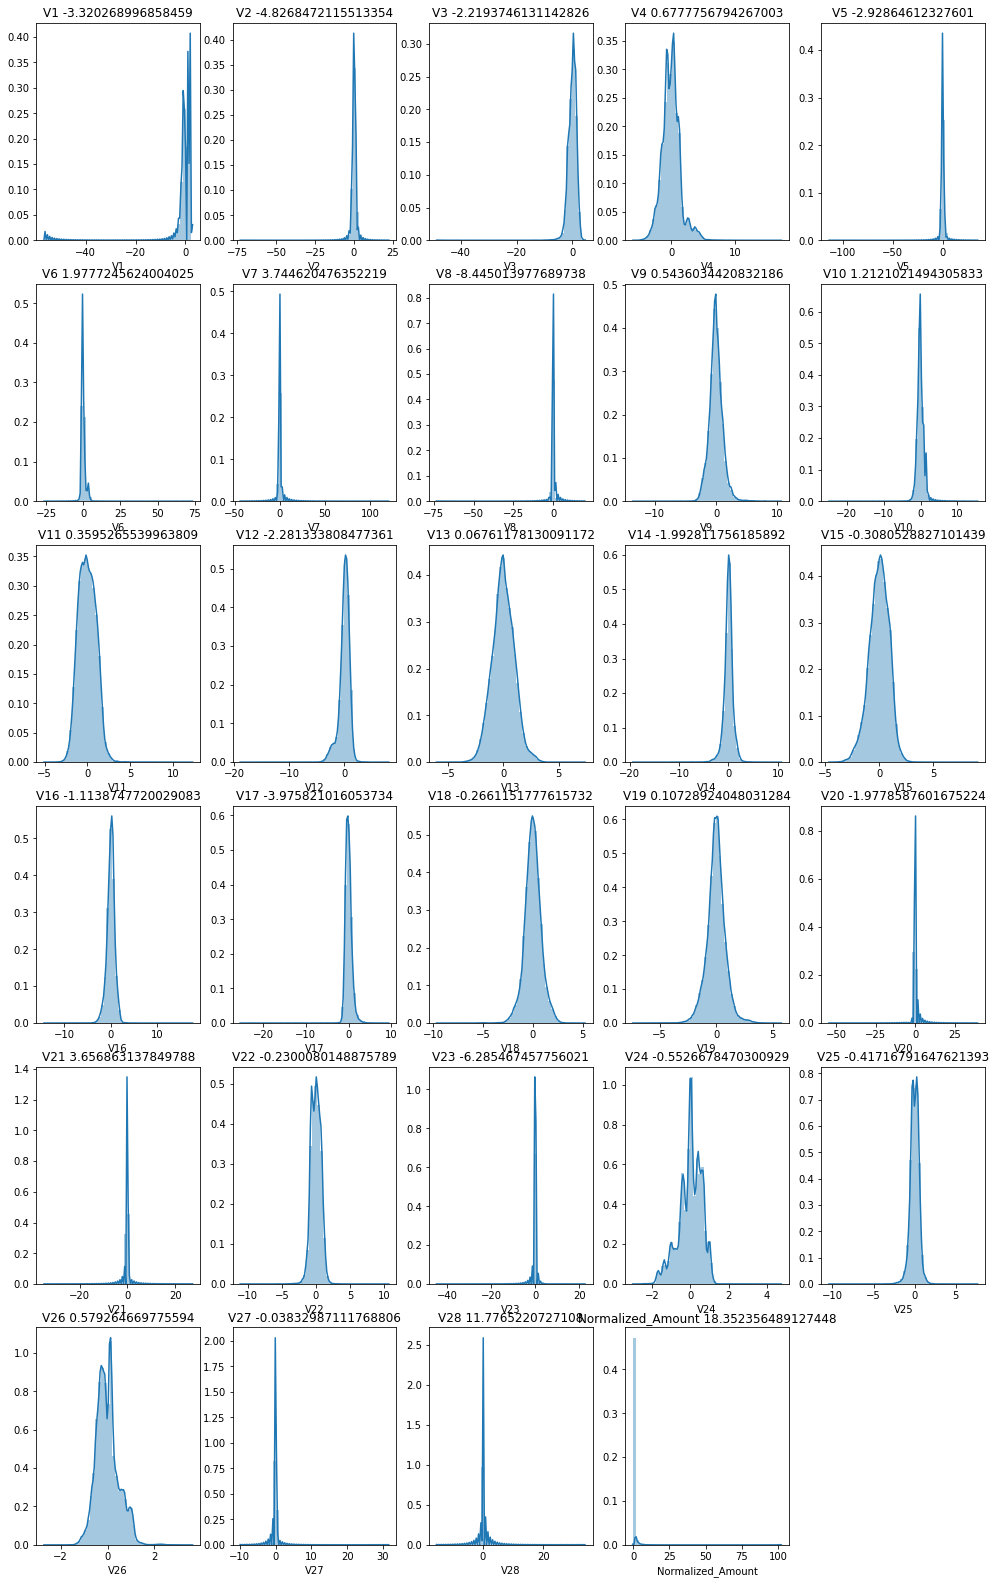

In [127]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(x_train[col])
    plt.title(col+' '+str(x_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

#### Mitigate skweness with PowerTransformer

In [128]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
x_train[cols] = pt.fit_transform(x_train)

In [129]:
# Transform the test set
x_test[cols] = pt.transform(x_test)

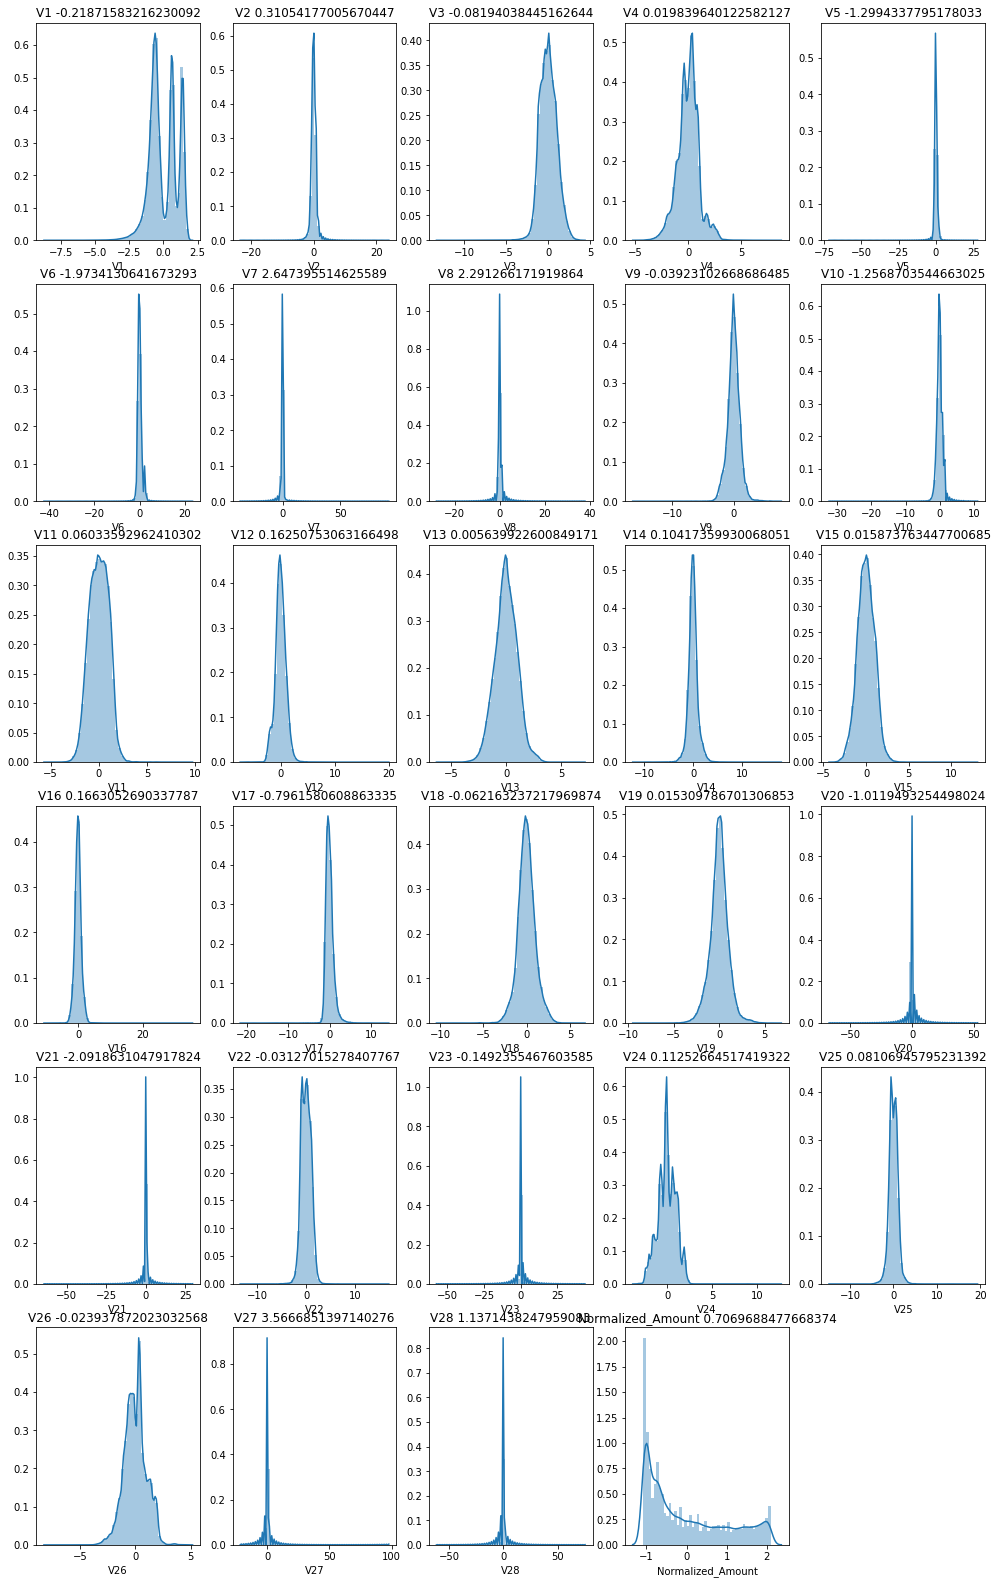

In [130]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(x_train[col])
    plt.title(col+' '+str(x_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

### Model building on imbalanced data

#### Metric selection for heavily imbalanced data
##### As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

#### Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
##### In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

##### For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN was not used for model building?
##### KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

### Logistic regression

In [131]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [132]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Tuning hyperparameter C which is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [133]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [134]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [135]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.965885,0.057738,0.031985,0.004288,0.01,{'C': 0.01},0.966163,0.989007,0.991354,0.970827,...,0.979826,0.009886,1,0.986599,0.981097,0.980072,0.986225,0.980538,0.982906,0.002883
1,1.282098,0.028393,0.029059,0.003484,0.1,{'C': 0.1},0.968402,0.985410,0.989254,0.968295,...,0.978561,0.008697,2,0.984971,0.979647,0.979028,0.985600,0.980299,0.981909,0.002793
2,1.375532,0.083440,0.029575,0.002729,1,{'C': 1},0.969235,0.984405,0.988160,0.967080,...,0.977935,0.008344,3,0.984122,0.978956,0.978526,0.985218,0.979942,0.981353,0.002769
3,1.334864,0.044291,0.028190,0.003543,10,{'C': 10},0.969334,0.984301,0.988022,0.966934,...,0.977856,0.008304,4,0.984009,0.978870,0.978468,0.985169,0.979895,0.981282,0.002764
4,1.372368,0.075335,0.028540,0.001340,100,{'C': 100},0.969350,0.984288,0.988009,0.966919,...,0.977849,0.008299,5,0.983998,0.978861,0.978461,0.985163,0.979890,0.981275,0.002764
5,1.321096,0.073010,0.029071,0.002970,1000,{'C': 1000},0.969349,0.984286,0.988008,0.966918,...,0.977848,0.008299,6,0.983997,0.978860,0.978461,0.985163,0.979889,0.981274,0.002764


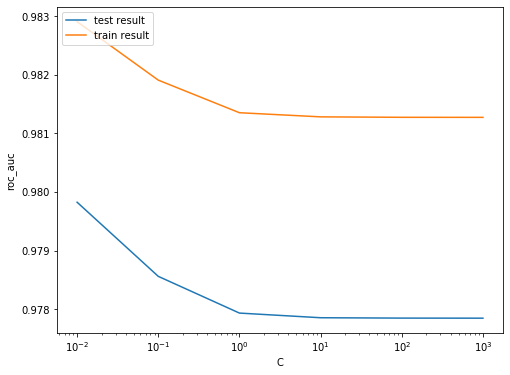

In [136]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [137]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9798257064121195 at C = 0.01


##### Logistic regression with optimal C

In [138]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [139]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(x_train, y_train)

##### Prediction on the train set

In [140]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(x_train)

In [141]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227424     27]
 [   154    240]]


In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992056002984485
Sensitivity:- 0.6091370558375635
Specificity:- 0.9998812931136817
F1-Score:- 0.7261724659606656


In [144]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.61      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845



##### ROC on the train set


In [145]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(x_train)[:,1]

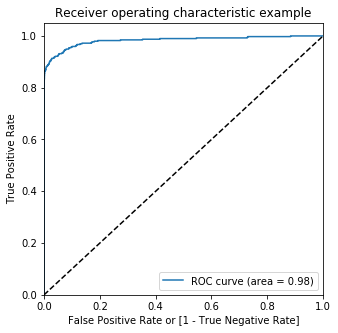

In [147]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Prediction on the test set

In [148]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(x_test)

In [149]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855     9]
 [   41    57]]


In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991222218320986
Sensitivity:- 0.5816326530612245
Specificity:- 0.9998417276308385
F1-Score:- 0.6951219512195121


In [152]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



##### ROC on the test set

In [153]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(x_test)[:,1]

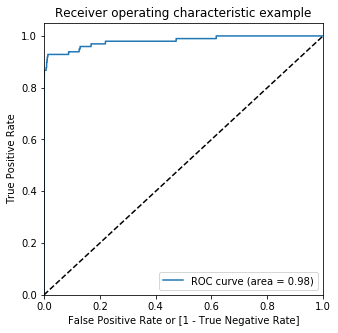

In [154]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.98, which is almost close to 1.

Model summary

Train set

Accuracy:- 0.9992056002984485
Sensitivity:- 0.6091370558375635
Specificity:- 0.9998812931136817
F1-Score:- 0.7261724659606656
ROC:- 0.98

Test set

Accuracy:- 0.9991222218320986
Sensitivity:- 0.5816326530612245
Specificity:- 0.9998417276308385
F1-Score:- 0.6951219512195121
ROC:-0.98
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### XGBoost

In [155]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [156]:
# Importing XGBoost
from xgboost import XGBClassifier

Tuning the hyperparameters

In [157]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                 

In [158]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.910083,0.139502,0.089394,0.007387,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.972621,0.973492,0.977180,0.974431,0.001976,3,0.999683,0.999816,0.999653,0.999717,0.000071
1,16.273251,0.102387,0.088476,0.002102,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978473,0.973756,0.985640,0.979290,0.004886,2,0.999955,0.999963,0.999896,0.999938,0.000030
2,19.175870,0.095918,0.089229,0.007651,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982187,0.971895,0.988788,0.980957,0.006951,1,0.999910,0.999895,0.999912,0.999906,0.000008
3,11.743807,0.126365,0.087394,0.004532,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.971304,0.961730,0.983461,0.972165,0.008893,6,0.999988,0.999998,0.999757,0.999914,0.000111
4,15.702320,0.179299,0.086104,0.002234,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.967480,0.967638,0.982626,0.972581,0.007103,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,18.609260,0.130539,0.088070,0.008488,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.976385,0.956182,0.984677,0.972415,0.011967,5,1.000000,1.000000,1.000000,1.000000,0.000000


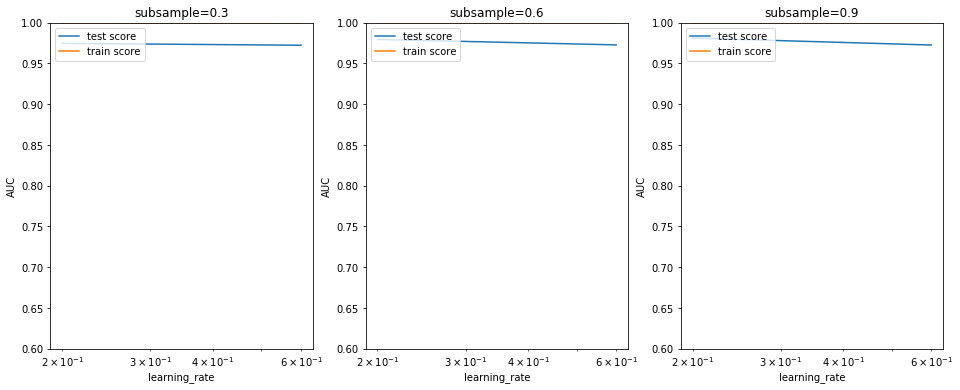

In [159]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
###### We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [160]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [161]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(x_train, y_train)

[22:17:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, ...)

#### Prediction on the train set

In [162]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(x_train)

In [163]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227451      0]
 [     0    394]]


In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [166]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [167]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(x_train)[:,1]

In [168]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

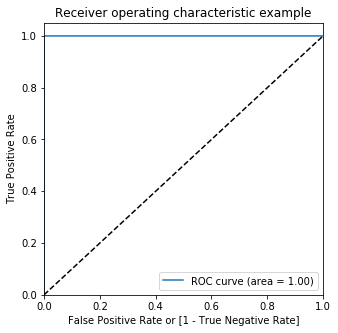

In [169]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Prediction on the test set

In [170]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(x_test)

In [171]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56862     2]
 [   19    79]]


In [172]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9996313331694814
Sensitivity:- 0.8061224489795918
Specificity:- 0.9999648283624085
F1-Score:- 0.88268156424581


In [174]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [175]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(x_test)[:,1]

In [176]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9823391723036992

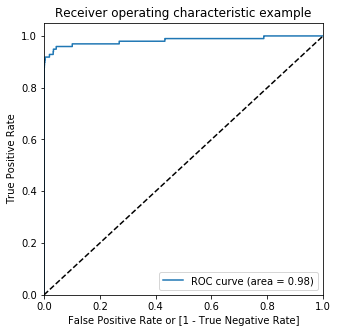

In [177]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
ROC: 1 


Test set
Accuracy:- 0.9996313331694814
Sensitivity:- 0.8061224489795918
Specificity:- 0.9999648283624085
F1-Score:- 0.88268156424581
ROC:- 0.98

Overall, the model is performing well in the test set, what it had learnt from the train set

### Random forest

In [180]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [187]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = 1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [189]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9992143783690539 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [190]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [191]:
# Fit the model
rfc_imb_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

Prediction on the train set

In [192]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(x_train)

In [193]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [194]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [195]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993460466545239
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7956104252400548


In [196]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.87      0.74      0.80       394

    accuracy                           1.00    227845
   macro avg       0.93      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [198]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(x_train)[:,1]

In [199]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.978616641634221

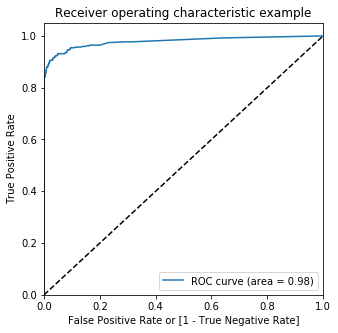

In [200]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Prediction on test set

In [201]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(x_test)

In [202]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56853    11]
 [   29    69]]


In [203]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [204]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992977774656788
Sensitivity:- 0.7040816326530612
Specificity:- 0.9998065559932471
F1-Score:- 0.7956104252400548


In [205]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.70      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [206]:

# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(x_test)[:,1]

In [207]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9662606196811871

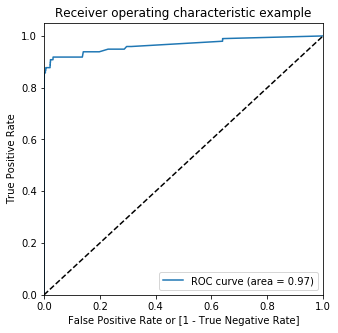

In [208]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary

Train:
Accuracy:- 0.9993460466545239
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7956104252400548
ROC:- 0.98

Test:
Accuracy:- 0.9992977774656788
Sensitivity:- 0.7040816326530612
Specificity:- 0.9998065559932471
F1-Score:- 0.7956104252400548
ROC:- 0.97

Choosing best model on the imbalanced data
We can see that among all the models we tried (Logistic, XGBoost and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. 

Top var = 17
2nd Top var = 14
3rd Top var = 10


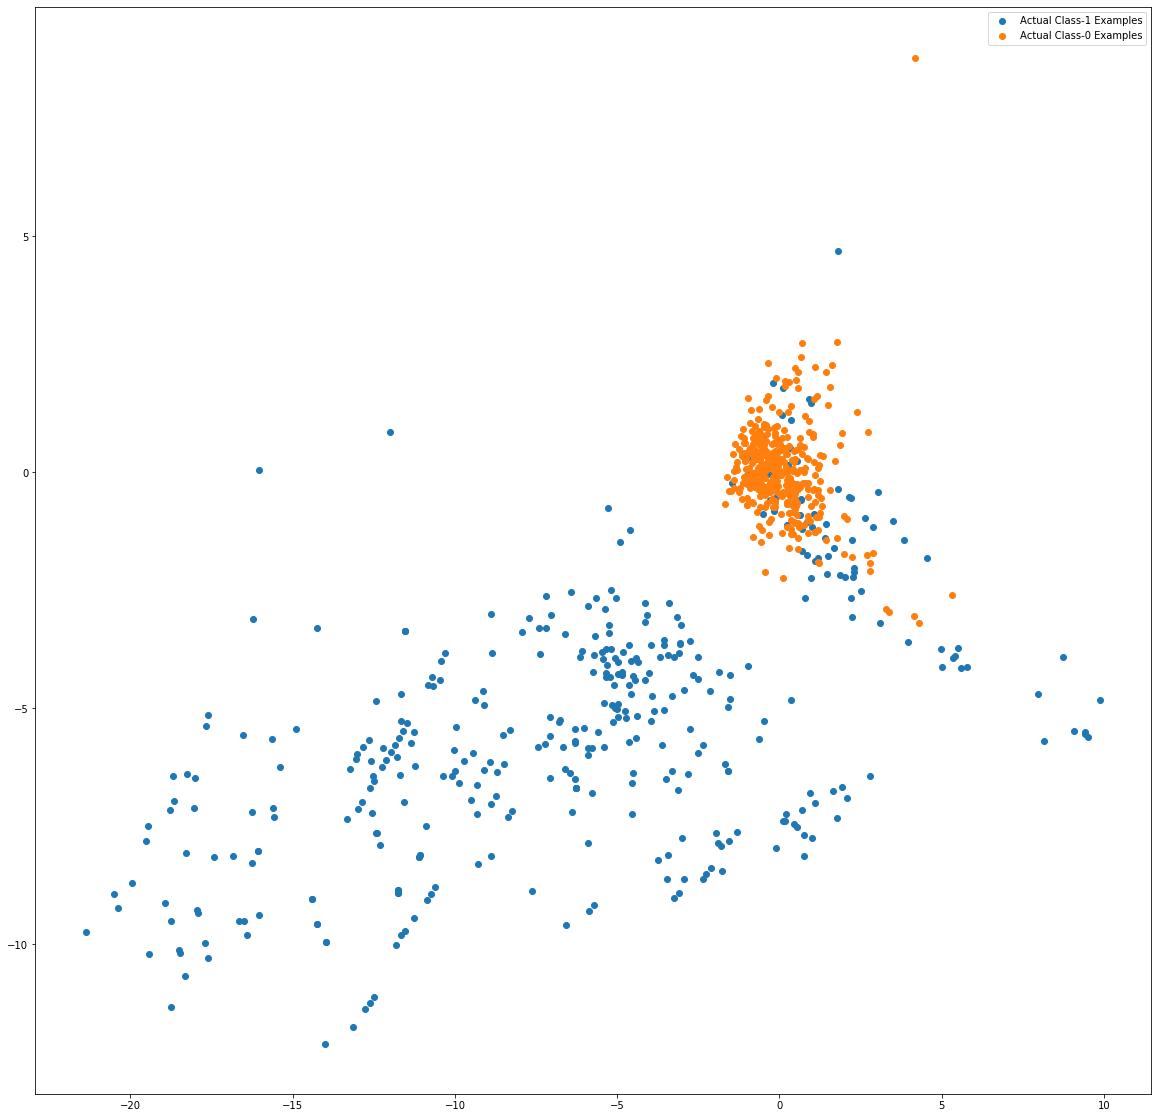

In [336]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

x_train_1 = x_train.to_numpy()[np.where(y_train==1.0)]
x_train_0 = x_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(x_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(x_train_1[:, top_var_index], x_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(x_train_0[:x_train_1.shape[0], top_var_index], x_train_0[:x_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [210]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.874395


We can see that the threshold is 0.87, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

#### Handling data imbalance
As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

#### SMOTE (Synthetic Minority Oversampling Technique)

In [212]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [218]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [219]:
print('Before SMOTE oversampling X_train shape=',x_train.shape)
print('After SMOTE oversampling X_train shape=',x_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454902, 29)


#### Logistic Regression

In [222]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [223]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.732339,0.083274,0.030750,0.001011,0.01,{'C': 0.01},0.989212,0.989149,0.989771,0.989340,...,0.989403,0.000228,6,0.989482,0.989437,0.989295,0.989421,0.989429,0.989413,0.000062
1,1.757288,0.020761,0.031262,0.000045,0.1,{'C': 0.1},0.989333,0.989257,0.989872,0.989433,...,0.989511,0.000225,5,0.989588,0.989548,0.989400,0.989526,0.989539,0.989520,0.000064
2,1.763689,0.058673,0.033073,0.001804,1,{'C': 1},0.989345,0.989269,0.989883,0.989442,...,0.989522,0.000225,4,0.989599,0.989560,0.989411,0.989537,0.989550,0.989531,0.000064
3,1.828171,0.091088,0.031342,0.000981,10,{'C': 10},0.989347,0.989270,0.989884,0.989443,...,0.989523,0.000225,3,0.989600,0.989561,0.989412,0.989538,0.989551,0.989532,0.000064
4,1.802524,0.062641,0.039461,0.008151,100,{'C': 100},0.989347,0.989270,0.989884,0.989443,...,0.989523,0.000225,2,0.989600,0.989561,0.989412,0.989538,0.989551,0.989532,0.000064
5,1.799695,0.020591,0.037675,0.007493,1000,{'C': 1000},0.989347,0.989270,0.989884,0.989443,...,0.989523,0.000225,1,0.989600,0.989561,0.989412,0.989538,0.989551,0.989532,0.000064


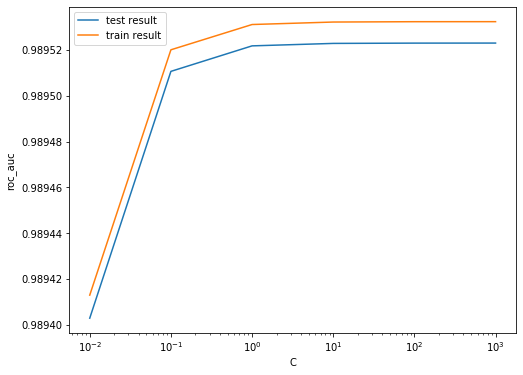

In [224]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [225]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9895230399357775 at C = 1000


Logistic regression with optimal C

In [226]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [227]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(x_train_smote, y_train_smote)

Prediction on the train set

In [228]:

# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(x_train_smote)

In [229]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[220981   6470]
 [ 18912 208539]]


In [230]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9442033668790201
Sensitivity:- 0.9168524209609982
Specificity:- 0.971554312797042


In [232]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



In [233]:

# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

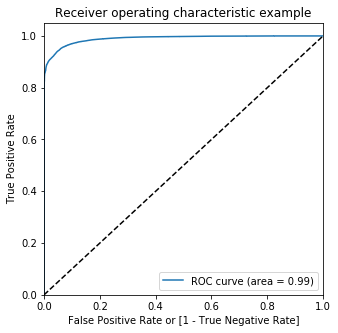

In [234]:

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [235]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(x_test)

In [236]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55185  1679]
 [    7    91]]


In [237]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [238]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9704013201783646
Sensitivity:- 0.9285714285714286
Specificity:- 0.9704734102419809


In [239]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



ROC on the test set

In [242]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(x_test)[:,1]

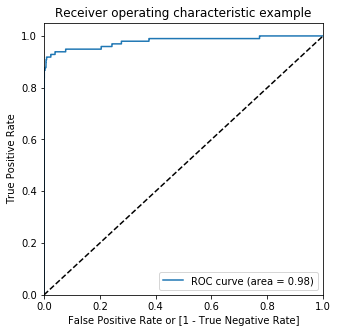

In [243]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
Train:
Accuracy:- 0.9442033668790201
Sensitivity:- 0.9168524209609982
Specificity:- 0.971554312797042
ROC:0.99

Test:
Accuracy:- 0.9704013201783646
Sensitivity:- 0.9285714285714286
Specificity:- 0.9704734102419809
ROC:0.98

XGBoost

In [244]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train_smote, y_train_smote) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                 

In [245]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,22.776981,0.265652,0.156213,0.012755,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999523,0.999580,0.999554,0.999552,0.000023,4,0.999615,0.999578,0.999583,0.999592,0.000016
1,31.548249,0.182052,0.161421,0.007365,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999502,0.999589,0.999546,0.999546,0.000036,5,0.999599,0.999591,0.999576,0.999588,0.000010
2,38.058800,0.172919,0.156213,0.012756,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999440,0.999550,0.999554,0.999515,0.000053,6,0.999550,0.999559,0.999576,0.999562,0.000011
3,23.198640,0.060849,0.161420,0.007364,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999944,0.999920,0.999928,0.999930,0.000010,3,0.999964,0.999949,0.999961,0.999958,0.000006
4,32.137832,0.024459,0.168080,0.008578,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999949,0.999946,0.999933,0.999943,0.000007,1,0.999971,0.999967,0.999970,0.999970,0.000002
5,38.490548,0.276826,0.141757,0.001648,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999934,0.999938,0.999937,0.999936,0.000002,2,0.999971,0.999968,0.999968,0.999969,0.000002


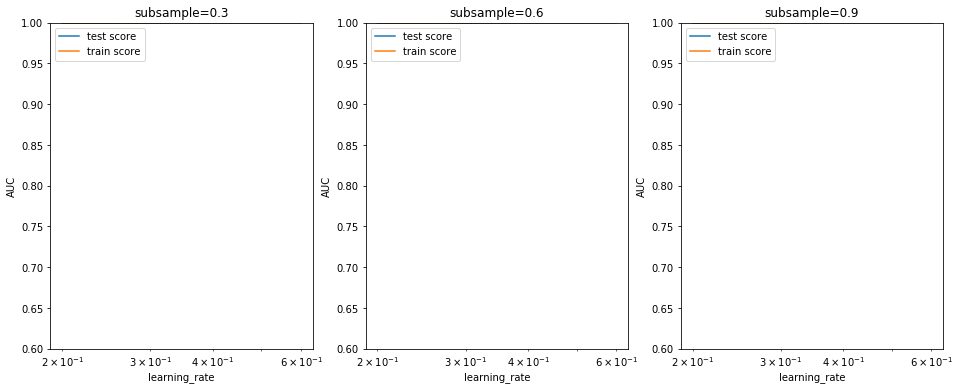

In [246]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

#### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [247]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [248]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(x_train_smote, y_train_smote)

[02:46:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, ...)

Prediction on the train set

In [249]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [250]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227449      2]
 [     0 227451]]


In [251]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [252]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034486549
Sensitivity:- 1.0
Specificity:- 0.9999912068973098


In [253]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [254]:

# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [255]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

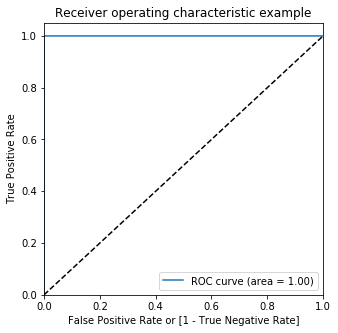

In [256]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Prediction on the test set

In [258]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(x_test)

In [259]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56839    25]
 [   15    83]]


In [260]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [261]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9992977774656788
Sensitivity:- 0.8469387755102041
Specificity:- 0.9995603545301069


In [262]:

# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [264]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(x_test)[:,1]

In [265]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9914509592525812

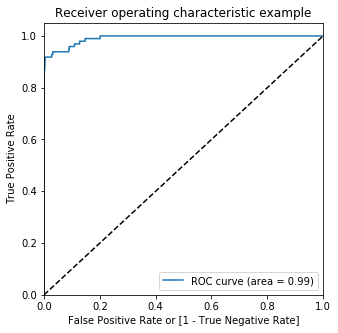

In [266]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

Train:-
Accuracy:- 0.9999956034486549
Sensitivity:- 1.0
Specificity:- 0.9999912068973098
ROC:-1


Accuracy:- 0.9992977774656788
Sensitivity:- 0.8469387755102041
Specificity:- 0.9995603545301069
ROC:0.99

#### AdaSyn (Adaptive Synthetic Sampling)

In [289]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [290]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
x_train_adasyn, y_train_adasyn = ada.fit_resample(x_train, y_train)

In [291]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({1: 227453, 0: 227451})


#### Logistic Regression

In [292]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(x_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [293]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.354808,0.097272,0.062529,0.012757,0.01,{'C': 0.01},0.963309,0.963512,0.964151,0.963657,0.000359,6,0.963827,0.963593,0.963628,0.963683,0.000103
1,1.390172,0.033466,0.062483,0.022094,0.1,{'C': 0.1},0.963589,0.963726,0.964389,0.963901,0.000349,5,0.964078,0.963836,0.963872,0.963928,0.000107
2,1.370079,0.017774,0.062502,0.000010,1,{'C': 1},0.963614,0.963743,0.964408,0.963922,0.000348,4,0.964099,0.963856,0.963892,0.963949,0.000107
3,1.377341,0.079462,0.057294,0.007347,10,{'C': 10},0.963616,0.963745,0.964409,0.963923,0.000348,3,0.964101,0.963858,0.963894,0.963951,0.000107
4,1.361489,0.063240,0.054009,0.010130,100,{'C': 100},0.963616,0.963745,0.964409,0.963924,0.000348,2,0.964102,0.963858,0.963894,0.963951,0.000107
5,1.449314,0.126338,0.062499,0.000005,1000,{'C': 1000},0.963616,0.963745,0.964409,0.963924,0.000347,1,0.964102,0.963858,0.963894,0.963951,0.000107


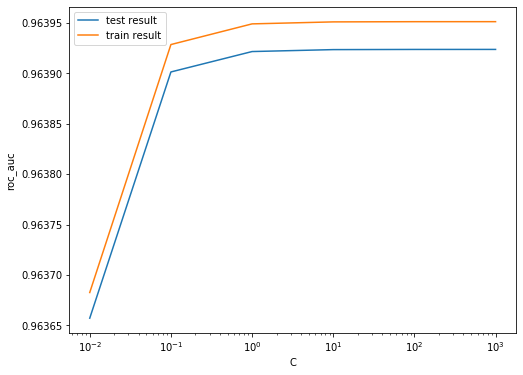

In [294]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [295]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9639236208276234 at C = 1000


Logistic regression with optimal C

In [296]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [297]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(x_train_adasyn, y_train_adasyn)

Prediction on the train set

In [298]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(x_train_adasyn)

In [299]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[206127  21324]
 [ 26576 200877]]


In [300]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [301]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.89470305822767
Sensitivity:- 0.8831582788532136
Specificity:- 0.906247939116557
F1-Score:- 0.8934736486276115


In [302]:

# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    227451
           1       0.90      0.88      0.89    227453

    accuracy                           0.89    454904
   macro avg       0.89      0.89      0.89    454904
weighted avg       0.89      0.89      0.89    454904



In [303]:

# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(x_train_adasyn)[:,1]

In [304]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9639501303682181

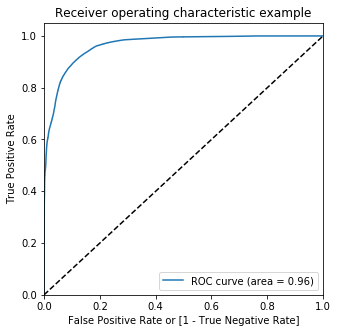

In [305]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [306]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(x_test)

In [307]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51440  5424]
 [    5    93]]


In [308]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [309]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9046908465292651
Sensitivity:- 0.9489795918367347
Specificity:- 0.9046145188519977


In [310]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



In [311]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(x_test)[:,1]

In [312]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9773194977203037

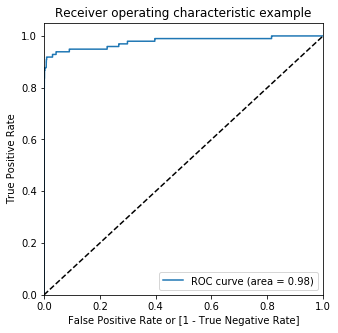

In [313]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary

Accuracy:- 0.89470305822767
Sensitivity:- 0.8831582788532136
Specificity:- 0.906247939116557
F1-Score:- 0.8934736486276115
ROC- 0.96

Accuracy:- 0.9046908465292651
Sensitivity:- 0.9489795918367347
Specificity:- 0.9046145188519977
ROC- 0.98



XGBoost

In [314]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train_adasyn, y_train_adasyn)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                 

In [315]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.139796,0.529601,0.140592,1.123916e-07,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.985376,0.965184,0.992350,0.980970,0.011520,4,0.998906,0.999158,0.998868,0.998977,0.000129
1,30.544222,0.441377,0.149795,1.266531e-02,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.985505,0.965323,0.991969,0.980932,0.011349,5,0.998944,0.999176,0.998733,0.998951,0.000181
2,36.741065,0.365629,0.153348,1.286495e-02,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.984757,0.962381,0.992636,0.979924,0.012815,6,0.998938,0.999100,0.998852,0.998963,0.000103
3,22.627082,0.101743,0.152805,4.819914e-03,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.994659,0.970459,0.993236,0.986118,0.011088,2,0.999924,0.999933,0.999901,0.999919,0.000013
4,31.225001,0.147103,0.165339,9.197193e-03,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.993047,0.970402,0.993214,0.985554,0.010715,3,0.999938,0.999933,0.999897,0.999923,0.000018
5,37.163865,0.101436,0.150888,7.282327e-03,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.994219,0.973832,0.992985,0.987012,0.009333,1,0.999921,0.999927,0.999922,0.999923,0.000003


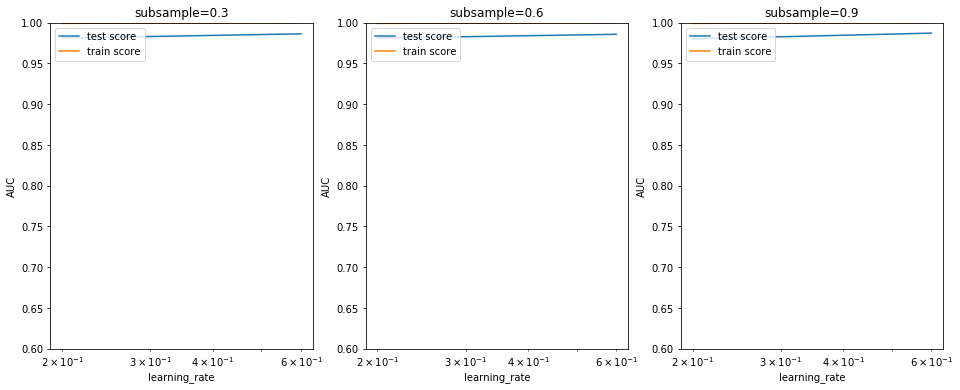

In [316]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [317]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [318]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(x_train_adasyn, y_train_adasyn)

[03:19:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, ...)

Prediction on the train set

In [319]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(x_train_adasyn)

In [320]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227451      0]
 [     0 227453]]


In [321]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [322]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999868104039533
Sensitivity:- 1.0
Specificity:- 1.0


In [323]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



In [324]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(x_train_adasyn)[:,1]

In [325]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

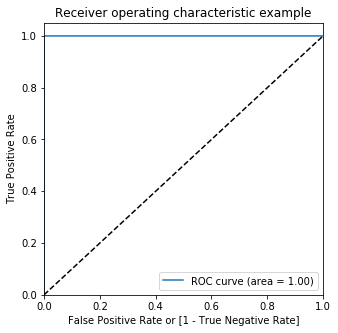

In [326]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [327]:

# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(x_test)

In [328]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56830    34]
 [   13    85]]


In [329]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [330]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9991748885221726
Sensitivity:- 0.8673469387755102
Specificity:- 0.9994020821609454


In [331]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.87      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [332]:

# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(x_test)[:,1]

In [333]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9915523468813524

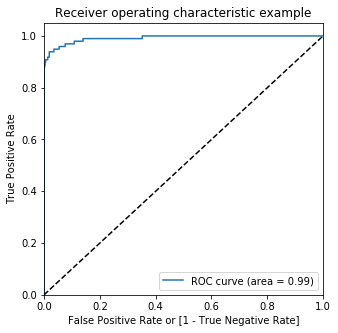

In [334]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model Summary

Accuracy:- 0.9999868104039533
Sensitivity:- 1.0
Specificity:- 1.0
ROC:- 1

Test:
Accuracy:- 0.9991748885221726
Sensitivity:- 0.8673469387755102
Specificity:- 0.9994020821609454
ROC:- 0.99



## Choosing the best model

He we balanced the data with various approach such as SMOTE and Adasy. With every data balancing thechnique we built best model such as Logistic, XGBoost.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

 SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the model is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simlicity and less resource requirement.

### Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

### Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.